# Numpy Intro

Felix Biessmann


# ``numpy``

- In machine learning you will work *a lot* with matrices
- ``numpy`` is the de facto standard for matrices in python
- Many other libraries have adopted and extended the API of numpy
    - ``scipy``
    - ``pandas``
    - many deep learning libraries

# ``numpy`` is fast


In [174]:
my_list = list(range(1000000))
%timeit [x * 2 for x in my_list]

117 ms ± 18.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [2]:
import numpy as np
np.random.seed(0)  # seed for reproducibility
my_arr = np.arange(1000000)
%timeit my_arr * 2

668 µs ± 79.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Creating Arrays

In [4]:
np.array([1, 4, 2, 5, 3])

array([1, 4, 2, 5, 3])

## Specifying data types at array creation time

In [8]:
np.array([1, 2, 3, 4], dtype='float32')

array([1., 2., 3., 4.], dtype=float32)

## Creating two-dimensional arrays

In [14]:
two_d_data = [list(range(i, i + 3)) for i in [2, 4, 6]]
two_d_data

[[2, 3, 4], [4, 5, 6], [6, 7, 8]]

In [15]:
np.array(two_d_data)

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

![Array indexing](figures/array_indexing.png)

## Creating Arrays from Scratch

In [16]:
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [28]:
# Create a 3x5 floating-point array filled with ones
np.ones((2, 3), dtype=float)

array([[1., 1., 1.],
       [1., 1., 1.]])

In [19]:
# something like builtin range function
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [20]:
# Create an array of five values evenly spaced between 0 and 1
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [39]:
# Create a 3x3 array of values uniformly distributed between 0 and 1
np.random.random((2, 3))

array([[0.5488135 , 0.71518937, 0.60276338],
       [0.54488318, 0.4236548 , 0.64589411]])

In [41]:
# Create a 3x3 array of random integers in the interval [0, 10)
np.random.randint(0, 10, (2, 3))

array([[8, 1, 5],
       [9, 8, 9]])

## Array Indexing and Slicing

Arrays are indexed like this:

``` python
x[index]
```

and sliced like this:

``` python
x[start:stop:step]
```

With defaults ``start=0``, ``stop=``*``size of dimension``*, ``step=1``.

Slices are *views* not *copies* (as for Lists)

### Two Dimensional Arrays

Items can be accessed using a comma-separated tuple of indices:

In [54]:
x2

array([[1, 5, 3, 9],
       [7, 2, 9, 8],
       [5, 0, 2, 8]])

In [55]:
x2[0, 0]

1

In [56]:
x2[2,-1]

8

### Slicing Two Dimensional Arrays

Same as with lists and one-dimensional arrays:

In [57]:
x2

array([[1, 5, 3, 9],
       [7, 2, 9, 8],
       [5, 0, 2, 8]])

In [58]:
x2[0,:] # entire first row

array([1, 5, 3, 9])

In [59]:
x2[0] # same as x2[0, :]

array([1, 5, 3, 9])

In [60]:
x2[:,0] # entire first column

array([1, 7, 5])

![Array indexing](figures/array_indexing_examples.png)

## Boolean Indexing

You can efficiently index arrays using boolean masks

In [116]:
grid = np.arange(1, 10)
grid

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [115]:
grid > 5

array([False, False, False, False, False,  True,  True,  True,  True])

In [117]:
grid[grid > 5]

array([6, 7, 8, 9])

## Fancy Indexing

Can give you arbitrary subsets of arrays given a set of indices

In [118]:
x = np.random.randint(100, size=10)
print(x)

[24 80 66 27 81 70 35 67 65 88]


In [119]:
[x[1], x[4]]

[80, 81]

In [123]:
ind = [1,4]
x[ind]

array([80, 81])

# Reshaping

Often you need to change the shape of an array; this is done with ``reshape``

In [67]:
grid = np.arange(1, 10)
grid

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [68]:
grid = grid.reshape((3, 3))
grid

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [69]:
row_vector = np.arange(3).reshape((1, 3))
row_vector

array([[0, 1, 2]])

In [70]:
column_vector = np.arange(3).reshape((3, 1))
column_vector

array([[0],
       [1],
       [2]])

# Broadcasting

In [5]:
# elementwise addition
a = np.array([0, 1, 2]) 
a + 5

array([5, 6, 7])

In [6]:
# elementwise addition
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

In [7]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [8]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [10]:
b = np.array([5, 5, 5]).reshape((3,1))
b

array([[5],
       [5],
       [5]])

In [13]:
a + b

array([[5, 6, 7],
       [5, 6, 7],
       [5, 6, 7]])

In [15]:
c = np.array([2,3])
a + c

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

In [17]:
a.reshape((3,1))

array([[0],
       [1],
       [2]])

In [18]:
a.reshape((3,1)) + c

array([[2, 3],
       [3, 4],
       [4, 5]])

![Broadcasting Visual](figures/broadcasting.png)

# Fast Vectorized Computations with UFuncs

- Python's defacult implementation CPython is slow for repeated executions
- This is mostly due to the fact that it's not compiled down to bytecode
- Major Bottlenecks are: type-checking and function dispatches
- ``numpy`` is fast since it allows to *vectorize* operations through NumPy's *universal functions* (ufuncs)
- For many tasks you can use plain python and ``numpy`` for efficient computations

## ``ufunc`` Arithmetic Operators and Shortcuts

| Operator	    | Equivalent ufunc    | Description                           |
|---------------|---------------------|---------------------------------------|
|``+``          |``np.add``           |Addition (e.g., ``1 + 1 = 2``)         |
|``-``          |``np.subtract``      |Subtraction (e.g., ``3 - 2 = 1``)      |
|``-``          |``np.negative``      |Unary negation (e.g., ``-2``)          |
|``*``          |``np.multiply``      |Multiplication (e.g., ``2 * 3 = 6``)   |
|``/``          |``np.divide``        |Division (e.g., ``3 / 2 = 1.5``)       |
|``//``         |``np.floor_divide``  |Floor division (e.g., ``3 // 2 = 1``)  |
|``**``         |``np.power``         |Exponentiation (e.g., ``2 ** 3 = 8``)  |
|``%``          |``np.mod``           |Modulus/remainder (e.g., ``9 % 4 = 1``)|

# Aggregation Functions

When working with large data sets, aggregations help to understand your data:

- Summing all values
- Min/Max 
- Quantiles
- Mean/Median

Again, python itself is slow at that, but ``numpy`` is fast

In [86]:
L = np.arange(10)
L

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [87]:
sum(L)

45

In [88]:
np.sum(L)

45

|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute mean of elements                      |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |

### Multi dimensional aggregates

In [100]:
M = np.ones((3, 4))
M

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [101]:
M.sum()

12.0

In [102]:
M.sum(axis=0)

array([3., 3., 3., 3.])

In [103]:
M.sum(axis=1)

array([4., 4., 4.])

## Fast Sorting in NumPy: ``np.sort`` and ``np.argsort``

In [124]:
np.sort(heights)

array([163, 168, 168, 170, 170, 171, 173, 173, 173, 173, 174, 175, 175,
       177, 178, 178, 178, 178, 179, 180, 182, 182, 182, 182, 183, 183,
       183, 183, 183, 183, 183, 183, 185, 185, 185, 188, 188, 188, 189,
       189, 193, 193])

In [125]:
heights[heights.argsort()]

array([163, 168, 168, 170, 170, 171, 173, 173, 173, 173, 174, 175, 175,
       177, 178, 178, 178, 178, 179, 180, 182, 182, 182, 182, 183, 183,
       183, 183, 183, 183, 183, 183, 185, 185, 185, 188, 188, 188, 189,
       189, 193, 193])

# Saving and Loading Arrays

In [126]:
arr = np.arange(10)
np.save('some_array', arr)
loaded_arr = np.load('some_array.npy')
loaded_arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Matrix Multiplication

In [167]:
A = np.array([[1,1],[1,1]])
B = np.array([[2,3],[4,5]])
A.dot(B)

array([[6, 8],
       [6, 8]])

In [168]:
A @ B

array([[6, 8],
       [6, 8]])

In [169]:
(A @ B).T

array([[6, 6],
       [8, 8]])

# Visualization

Let's create some toy data:

$X \in R^{100,2} \sim \mathcal{N}(0,1)$


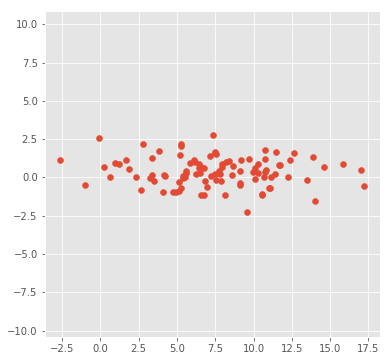

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
# set some other plotting style
plt.style.use('ggplot')

plt.figure(figsize=(6,6))
X = np.random.randn(100,2)
# add some offset
X += np.array([2,.5])
# scale the first dimension
X[:,0] *= 4
plt.scatter(X[:,0],X[:,1]);
plt.axis('equal');